In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Data/Spam.csv')
data

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,2,12,5.500000,8,4.083334,2,15,7,0,...,-1,-1,-1,0.676804,0.860529,-1.000000,-1.000000,-1.000000,-1.000000,benign
1,0,3,12,5.000000,10,3.583333,3,12,8,2,...,1,0,-1,0.715629,0.776796,0.693127,0.738315,1.000000,-1.000000,benign
2,2,2,11,4.000000,5,4.750000,2,16,11,0,...,2,0,1,0.677701,1.000000,0.677704,0.916667,0.000000,0.898227,benign
3,0,2,7,4.500000,7,5.714286,2,15,10,0,...,0,0,-1,0.696067,0.879588,0.818007,0.753585,0.000000,-1.000000,benign
4,19,2,10,6.000000,9,2.250000,2,9,5,0,...,5,4,3,0.747202,0.833700,0.655459,0.829535,0.836150,0.823008,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14474,29,4,14,5.750000,12,3.666667,4,20,24,3,...,3,2,7,0.690555,0.791265,0.777498,0.690227,0.656684,0.796205,spam
14475,0,4,13,3.750000,8,8.461538,4,24,23,0,...,16,15,-1,0.665492,0.820010,0.879588,0.674400,0.674671,-1.000000,spam
14476,58,3,27,6.666666,16,3.375000,3,41,34,20,...,8,7,9,0.656807,0.801139,0.684777,0.713622,0.717187,0.705245,spam
14477,35,3,13,4.333334,9,3.600000,3,15,13,7,...,9,8,3,0.725963,0.897617,0.871049,0.745932,0.758824,0.790772,spam


In [3]:
data.columns

Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
       'ISIpAddressInDomainName', 'CharacterContinuityRate',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPathToken

In [4]:
data['URL_Type_obf_Type'].value_counts()

benign    7781
spam      6698
Name: URL_Type_obf_Type, dtype: int64

In [5]:
data.loc[data['URL_Type_obf_Type']=='benign','URL_Type_obf_Type'] = 0
data.loc[data['URL_Type_obf_Type']=='spam','URL_Type_obf_Type'] = 1
data = data.fillna(data.mean())
data['URL_Type_obf_Type'].value_counts()

0    7781
1    6698
Name: URL_Type_obf_Type, dtype: int64

In [6]:
y = data.pop('URL_Type_obf_Type')
X = data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
10313,35,3,12,4.333334,9,3.500000,3,19,22,7,...,1,9,8,3,0.714269,0.897617,0.871049,0.724510,0.723728,0.765088
4316,3,3,8,2.666667,3,7.666666,3,17,11,0,...,3,3,2,1,0.744683,0.796658,0.764019,0.942331,1.000000,1.000000
6982,54,2,14,5.500000,8,13.500000,2,20,15,13,...,1,11,10,9,0.699386,0.860529,0.789690,0.733393,0.739401,0.758802
3708,0,2,8,3.500000,4,4.250000,2,9,8,0,...,3,1,0,-1,0.732888,0.916667,0.826537,0.829302,1.000000,-1.000000
9951,18,3,14,3.666667,7,2.666667,3,25,14,1,...,-1,14,13,12,0.703592,0.833700,0.679250,0.717788,0.717675,0.713852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11468,8,4,6,7.000000,12,3.500000,4,6,7,0,...,1,3,2,1,0.771906,0.806131,0.879588,0.883402,0.902789,0.901158
7221,0,2,7,6.500000,10,3.857143,2,12,6,0,...,4,0,0,-1,0.709488,0.924957,0.800121,0.947443,0.000000,-1.000000
1318,42,2,12,5.500000,8,13.500000,2,26,21,11,...,1,9,8,7,0.717884,0.860529,0.789690,0.753592,0.768071,0.783127
8915,5,3,7,5.000000,11,4.000000,3,9,7,0,...,1,5,4,3,0.773452,0.845224,0.871049,0.875713,0.891527,0.897617


In [9]:
clf = RandomForestClassifier(n_estimators=30, max_depth=10)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=30)

In [10]:
label_predict = clf.predict(X_test)
label_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
accuracy_score(y_test, label_predict)

0.9979281767955801

In [12]:
fpr,tpr,threshold = roc_curve(y_test, label_predict)
roc_auc = auc(fpr,tpr)

<Figure size 640x480 with 0 Axes>

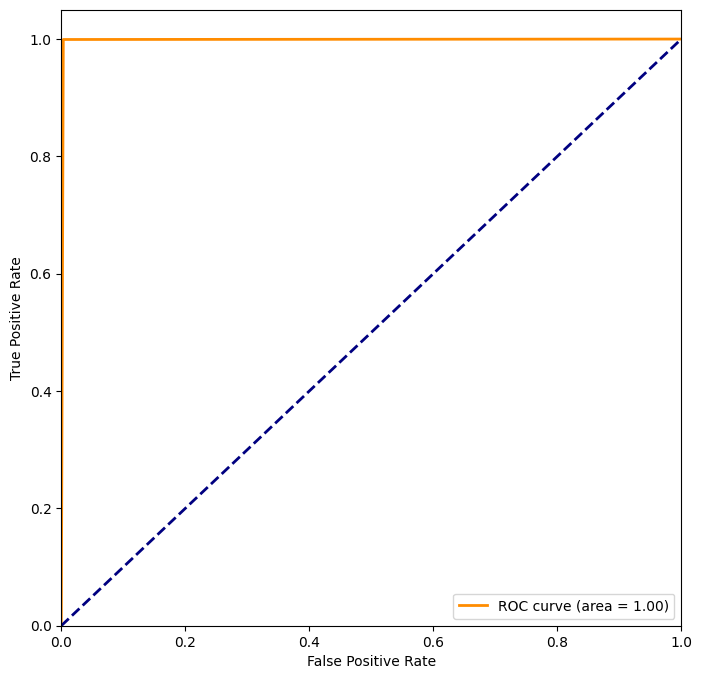

In [16]:
plt.figure()
lw = 2
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()